In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

general_data = pd.read_csv("data_set/general_data.csv")
employee_survey_data = pd.read_csv("data_set/employee_survey_data.csv")
in_time = pd.read_csv("data_set/in_time.csv")
manager_survey_data = pd.read_csv("data_set/manager_survey_data.csv")
out_time = pd.read_csv("data_set/out_time.csv")
general_data

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,0.0,Y,14,8,1,10.0,2,9,7,8


In [125]:
general_data.isna().any()

Age                        False
Attrition                  False
BusinessTravel             False
Department                 False
DistanceFromHome           False
Education                  False
EducationField             False
EmployeeCount              False
EmployeeID                 False
Gender                     False
JobLevel                   False
JobRole                    False
MaritalStatus              False
MonthlyIncome              False
NumCompaniesWorked          True
Over18                     False
PercentSalaryHike          False
StandardHours              False
StockOptionLevel           False
TotalWorkingYears           True
TrainingTimesLastYear      False
YearsAtCompany             False
YearsSinceLastPromotion    False
YearsWithCurrManager       False
dtype: bool

In [126]:
(general_data.isna().sum() / len(general_data) * 100).sort_values(ascending=False)

NumCompaniesWorked         0.430839
TotalWorkingYears          0.204082
Age                        0.000000
Attrition                  0.000000
YearsSinceLastPromotion    0.000000
YearsAtCompany             0.000000
TrainingTimesLastYear      0.000000
StockOptionLevel           0.000000
StandardHours              0.000000
PercentSalaryHike          0.000000
Over18                     0.000000
MonthlyIncome              0.000000
MaritalStatus              0.000000
JobRole                    0.000000
JobLevel                   0.000000
Gender                     0.000000
EmployeeID                 0.000000
EmployeeCount              0.000000
EducationField             0.000000
Education                  0.000000
DistanceFromHome           0.000000
Department                 0.000000
BusinessTravel             0.000000
YearsWithCurrManager       0.000000
dtype: float64

In [127]:
general_data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [128]:
general_data["NumCompaniesWorked"] = general_data["NumCompaniesWorked"].fillna(general_data["NumCompaniesWorked"].median())
general_data["TotalWorkingYears"] = general_data["TotalWorkingYears"].fillna(general_data["TotalWorkingYears"].median())

In [129]:
general_data.isna().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

In [130]:
general_data.drop("Over18",axis=1,inplace=True)

In [131]:
# yes = 1 , no = 0
general_data["Attrition"] = general_data["Attrition"].apply(lambda x: 1 if x == 'Yes' else 0)

In [132]:
general_data["Attrition"].value_counts()

0    3699
1     711
Name: Attrition, dtype: int64

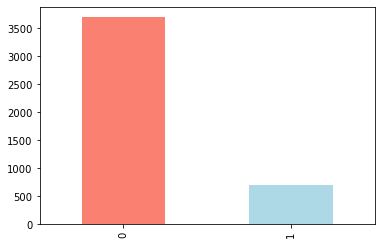

In [133]:
general_data["Attrition"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [134]:
general_data.dtypes

Age                          int64
Attrition                    int64
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeID                   int64
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
PercentSalaryHike            int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
dtype: object

In [135]:
general_data["BusinessTravel"].value_counts() ,

(Travel_Rarely        3129
 Travel_Frequently     831
 Non-Travel            450
 Name: BusinessTravel, dtype: int64,)

In [136]:
general_data["Department"].value_counts() ,

(Research & Development    2883
 Sales                     1338
 Human Resources            189
 Name: Department, dtype: int64,)

In [137]:
general_data["JobRole"].value_counts() ,

(Sales Executive              978
 Research Scientist           876
 Laboratory Technician        777
 Manufacturing Director       435
 Healthcare Representative    393
 Manager                      306
 Sales Representative         249
 Research Director            240
 Human Resources              156
 Name: JobRole, dtype: int64,)

In [138]:
general_data["BusinessTravel"].value_counts() ,

(Travel_Rarely        3129
 Travel_Frequently     831
 Non-Travel            450
 Name: BusinessTravel, dtype: int64,)

In [139]:
general_data["Gender"].value_counts() ,

(Male      2646
 Female    1764
 Name: Gender, dtype: int64,)

In [140]:
general_data["MaritalStatus"].value_counts() ,



(Married     2019
 Single      1410
 Divorced     981
 Name: MaritalStatus, dtype: int64,)

In [141]:
category = {
    "Travel_Rarely" : 1,
    "Travel_Frequently " : 2,
    "Non-Travel" :  0,
    "Married" : 1,
    "Single " : 2,
    "Divorced" :  0,
    "Research & Development" :  0,
    "Sales" : 1,
    "Human Resources" : 0,
    "Sales Executive"   : 1,
 "Research Scientist"   : 2,
 "Laboratory Technician": 3,
"Manufacturing Director" : 4,
 "Healthcare Representative": 5,
 "Manager": 6,
 "Sales Representative" : 7,
 "Research Director": 8,

}

In [142]:
general_data.drop("EducationField",axis=1,inplace=True)

In [143]:
general_data.dtypes

Age                          int64
Attrition                    int64
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EmployeeCount                int64
EmployeeID                   int64
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
PercentSalaryHike            int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
dtype: object

In [144]:
general_data["MaritalStatus"].value_counts()

Married     2019
Single      1410
Divorced     981
Name: MaritalStatus, dtype: int64

In [145]:
general_data["Gender"].value_counts()

Male      2646
Female    1764
Name: Gender, dtype: int64

In [146]:
# male = 0 , female = 1
general_data["Gender"] = general_data["Gender"].apply(lambda x: 1 if x == 'Female' else 0)

In [147]:
general_data.dtypes



Age                          int64
Attrition                    int64
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EmployeeCount                int64
EmployeeID                   int64
Gender                       int64
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
PercentSalaryHike            int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
dtype: object

In [148]:
general_data["MonthlyIncome"].value_counts()

23420     12
27410      9
26100      9
25590      9
34520      9
          ..
109380     3
35640      3
23350      3
43820      3
28670      3
Name: MonthlyIncome, Length: 1349, dtype: int64

In [149]:
general_data.dtypes

Age                          int64
Attrition                    int64
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EmployeeCount                int64
EmployeeID                   int64
Gender                       int64
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
PercentSalaryHike            int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
dtype: object

In [150]:
pd.crosstab(general_data.Attrition, general_data.Gender)


Gender,0,1
Attrition,,
0,2205,1494
1,441,270


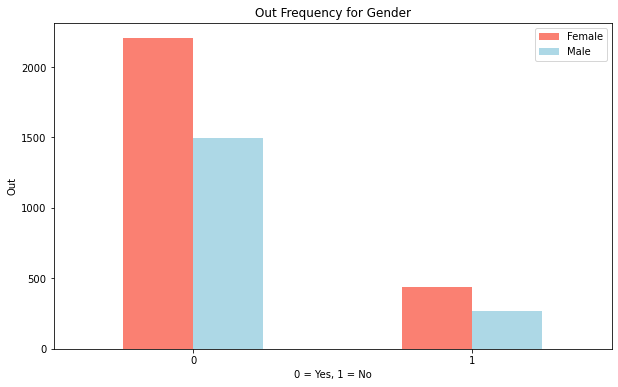

In [151]:
pd.crosstab(general_data.Attrition, general_data.Gender).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["salmon", "lightblue"])

plt.title("Out Frequency for Gender")
plt.xlabel("0 = Yes, 1 = No")
plt.ylabel("Out")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);


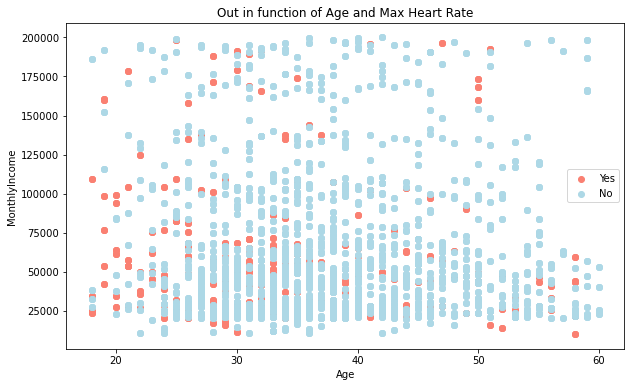

In [152]:
plt.figure(figsize=(10, 6))

# Scatter with postivie examples
plt.scatter(general_data.Age[general_data.Attrition==1],
            general_data.MonthlyIncome[general_data.Attrition==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(general_data.Age[general_data.Attrition==0],
            general_data.MonthlyIncome[general_data.Attrition==0],
            c="lightblue")

# Add some helpful info
plt.title("Out in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("MonthlyIncome")
plt.legend(["Yes", "No"]);

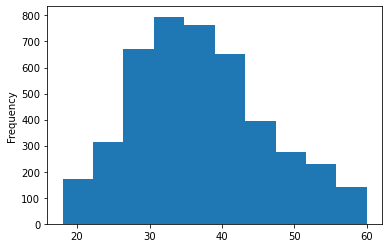

In [153]:
general_data.Age.plot.hist();

In [154]:
general_data.dtypes

Age                          int64
Attrition                    int64
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EmployeeCount                int64
EmployeeID                   int64
Gender                       int64
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
PercentSalaryHike            int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
dtype: object

In [155]:
pd.crosstab(general_data.Department, general_data.Attrition)

Attrition,0,1
Department,,
Human Resources,132,57
Research & Development,2430,453
Sales,1137,201


In [156]:
pd.crosstab(general_data.JobRole, general_data.Attrition)

Attrition,0,1
JobRole,,
Healthcare Representative,336,57
Human Resources,135,21
Laboratory Technician,651,126
Manager,264,42
Manufacturing Director,387,48
Research Director,183,57
Research Scientist,717,159
Sales Executive,813,165
Sales Representative,213,36


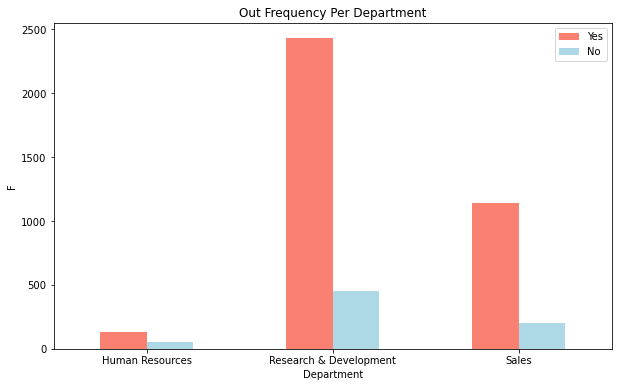

In [157]:
pd.crosstab(general_data.Department, general_data.Attrition).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["salmon", "lightblue"])

# Add some communication
plt.title("Out Frequency Per Department")
plt.xlabel("Department")
plt.ylabel("F")
plt.legend(["Yes", "No"])
plt.xticks(rotation=0);

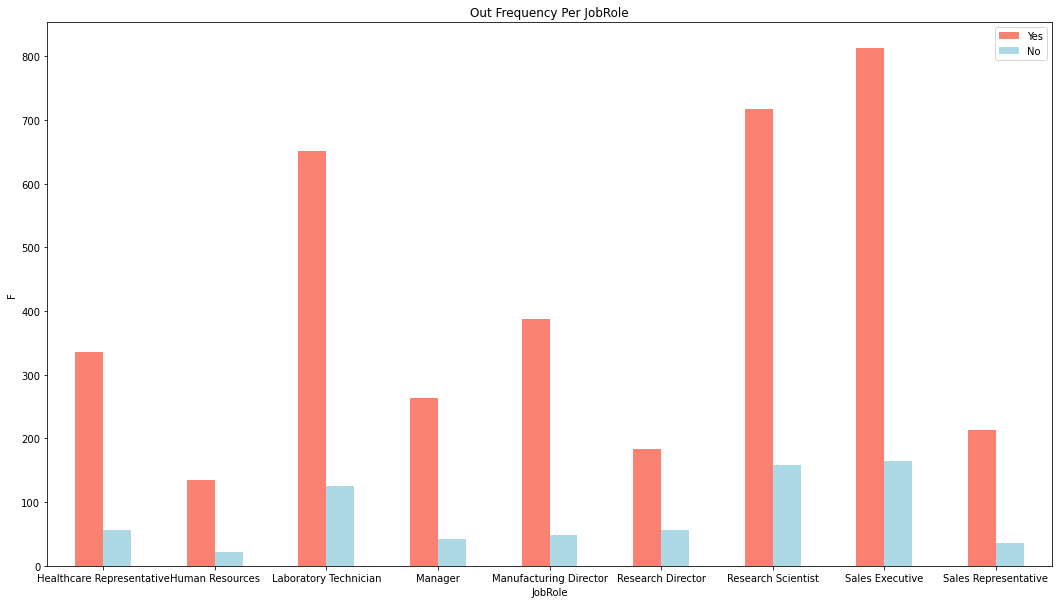

In [158]:
pd.crosstab(general_data.JobRole, general_data.Attrition).plot(kind="bar",
                                   figsize=(18, 10),
                                   color=["salmon", "lightblue"])

# Add some communication
plt.title("Out Frequency Per JobRole")
plt.xlabel("JobRole")
plt.ylabel("F")
plt.legend(["Yes", "No"])
plt.xticks(rotation=0);

(18.5, -0.5)

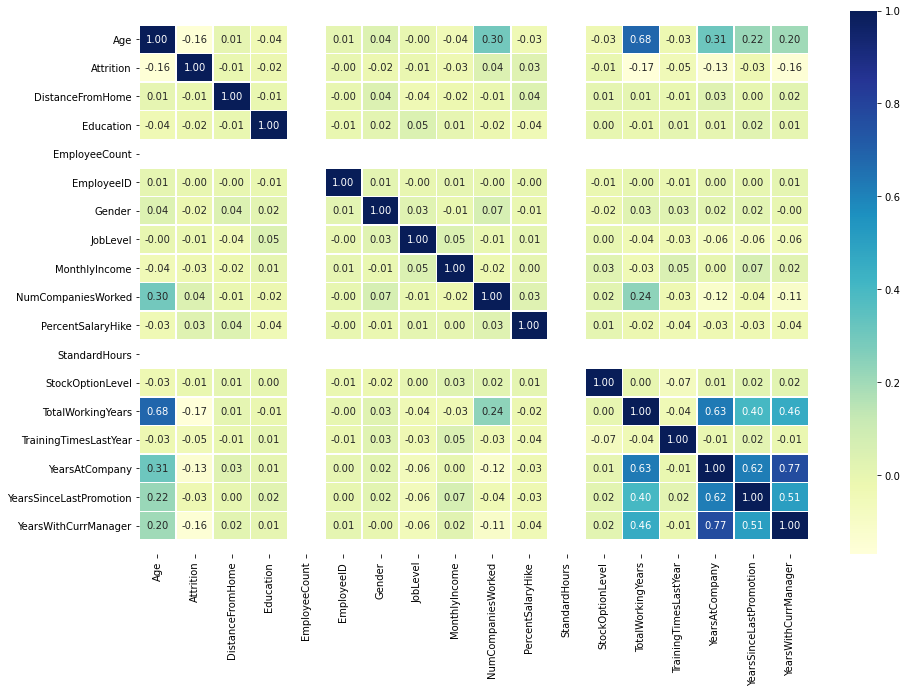

In [159]:
corr_matrix = general_data.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)


In [160]:
general_data_loop = general_data
for col in general_data_loop.select_dtypes('object') :
    general_data_loop[col] = general_data_loop[col].map(category)

(22.5, -0.5)

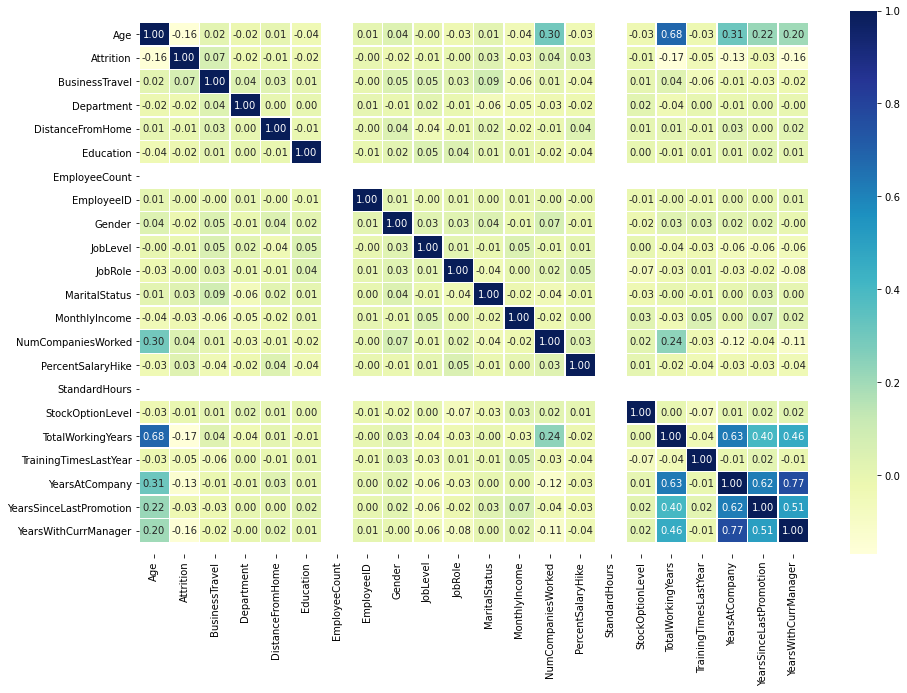

In [161]:
corr_matrix = general_data_loop.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [162]:
general_data_loop.dtypes


Age                          int64
Attrition                    int64
BusinessTravel             float64
Department                   int64
DistanceFromHome             int64
Education                    int64
EmployeeCount                int64
EmployeeID                   int64
Gender                       int64
JobLevel                     int64
JobRole                      int64
MaritalStatus              float64
MonthlyIncome                int64
NumCompaniesWorked         float64
PercentSalaryHike            int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
dtype: object